In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [7]:
import os
print(os.getcwd())


c:\Users\sdubey\Desktop\BUS ADM Project


In [8]:
data = pd.read_csv('Credit Card Defaulter Prediction.csv')
data.columns = data.columns.str.strip()
print(data.head())

   ID  LIMIT_BAL SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000   F  University  Married   24      2      2     -1     -1   
1   2     120000   F  University   Single   26     -1      2      0      0   
2   3      90000   F  University   Single   34      0      0      0      0   
3   4      50000   F  University  Married   37      0      0      0      0   
4   5      50000   M  University  Married   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0         0         0         0        Y  
1     

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [10]:
data.shape
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [11]:
data.drop('ID', axis=1, inplace=True)

In [12]:
data.duplicated().sum()

np.int64(35)

In [13]:
data = data.drop_duplicates()

In [14]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [15]:
data.columns = data.columns.str.strip()

In [16]:
data["default"].value_counts()

default
N    23335
Y     6630
Name: count, dtype: int64

In [17]:
data.SEX.value_counts()

SEX
F    18091
M    11874
Name: count, dtype: int64

In [18]:
data.EDUCATION.value_counts()

EDUCATION
University         14019
Graduate school    10563
High School         4915
Unknown              331
Others               123
0                     14
Name: count, dtype: int64

In [19]:
data.MARRIAGE.value_counts()

MARRIAGE
Single     15945
Married    13643
Other        323
0             54
Name: count, dtype: int64

In [22]:
import seaborn as sns

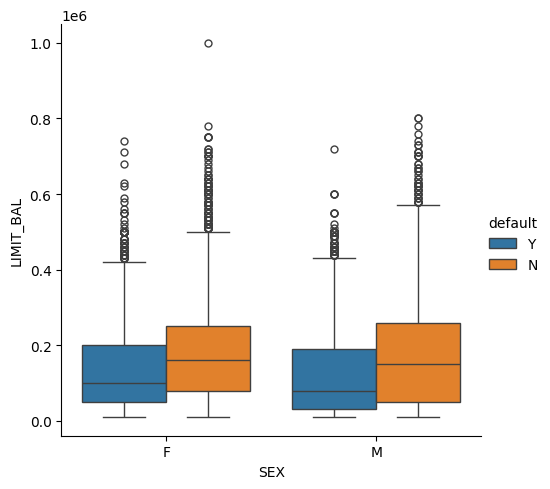

In [23]:
sns.catplot(x='SEX', y='LIMIT_BAL', hue='default', kind='box', data=data)

<Axes: >

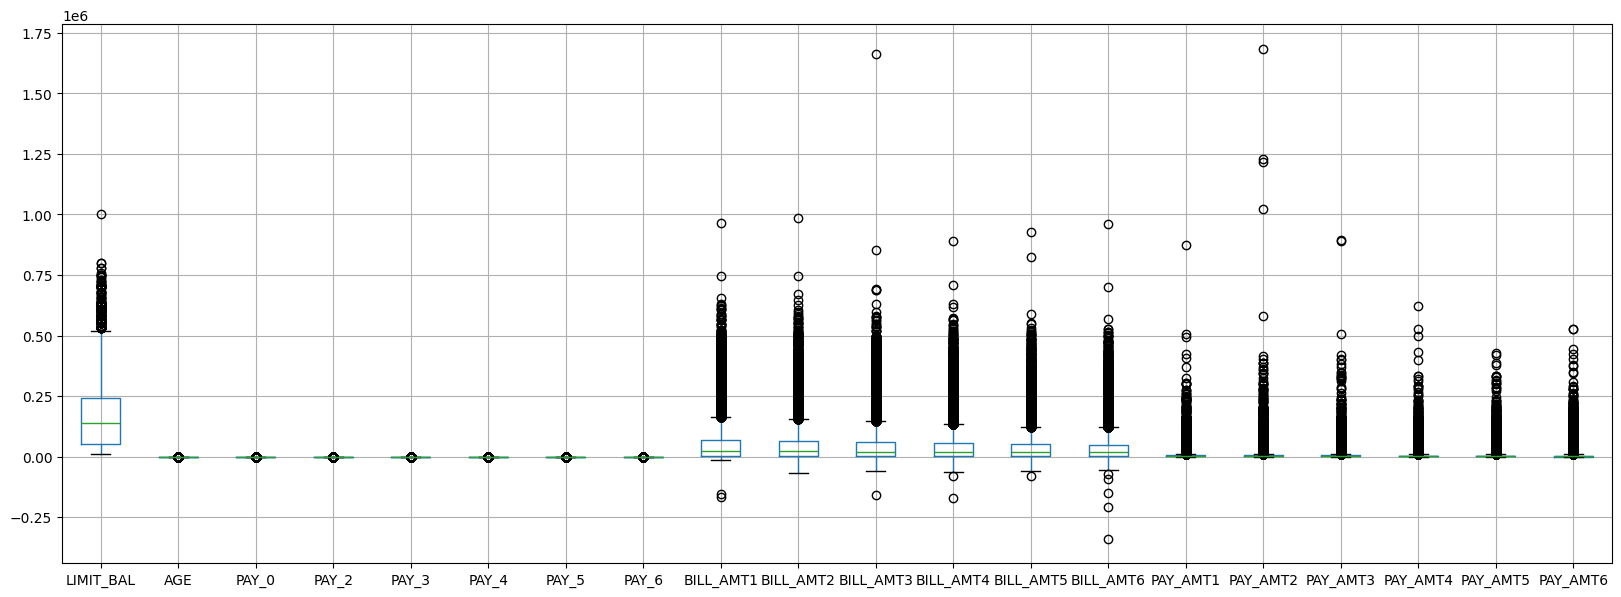

In [24]:
plt.figure(figsize=(20,7))
data.boxplot()

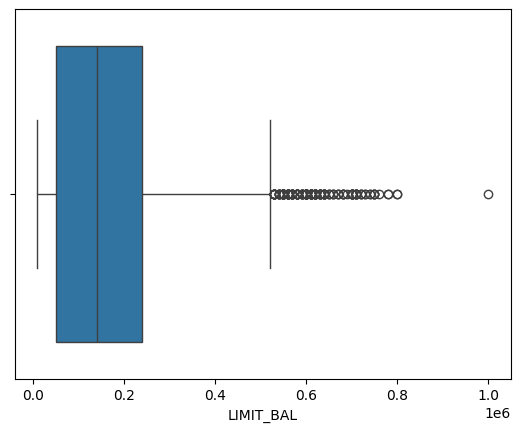

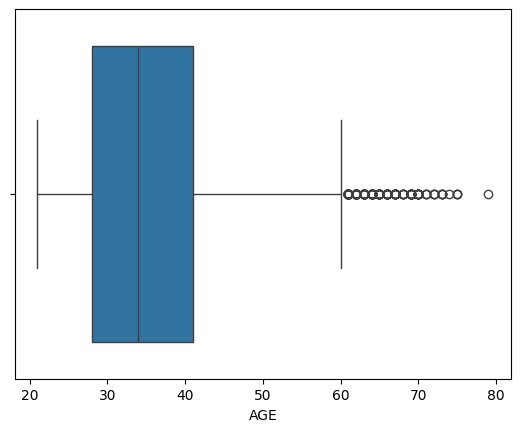

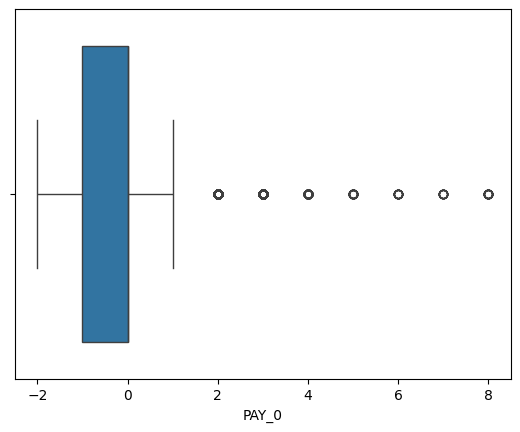

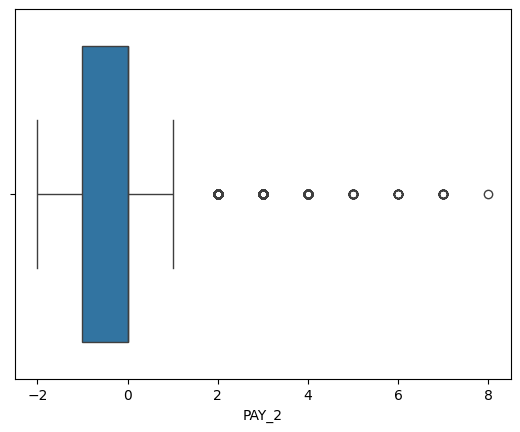

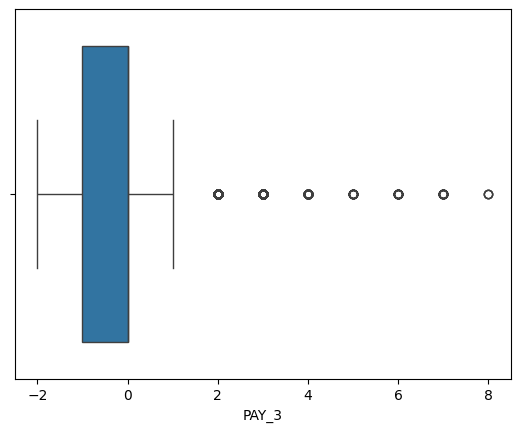

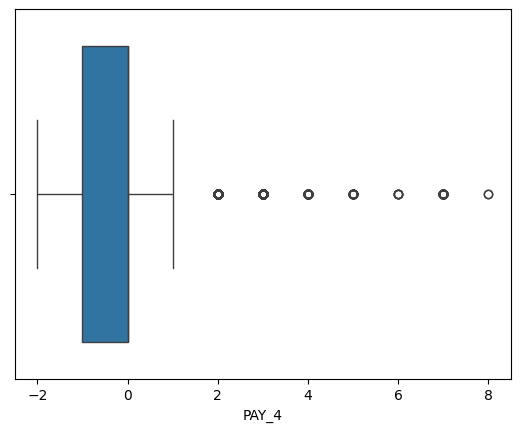

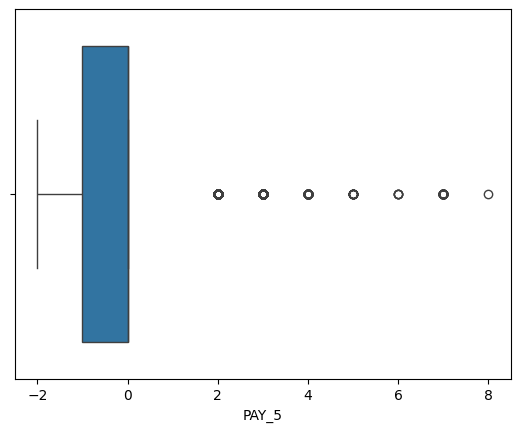

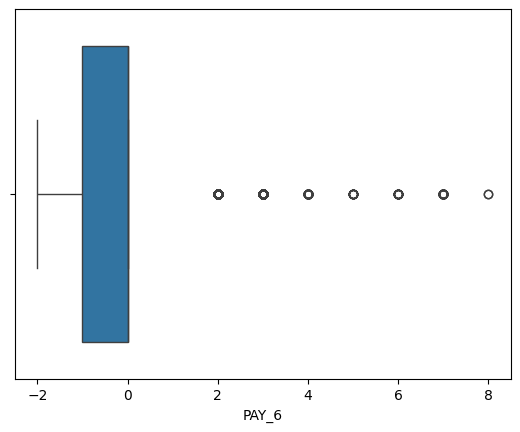

In [25]:
features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for feature in features:
    sns.boxplot(x=feature, data=data)
    plt.show()

<Axes: xlabel='PAY_AMT1'>

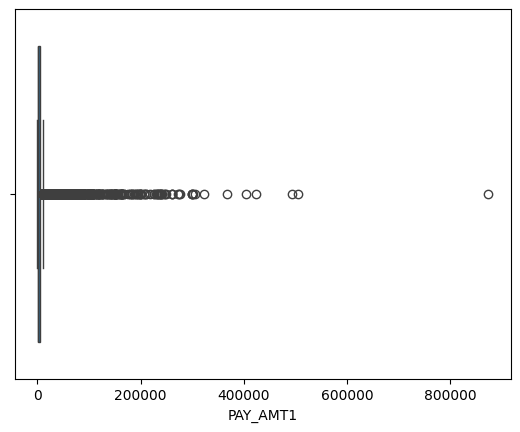

In [24]:
sns.boxplot(x='PAY_AMT1', data=data)

<Axes: xlabel='BILL_AMT1'>

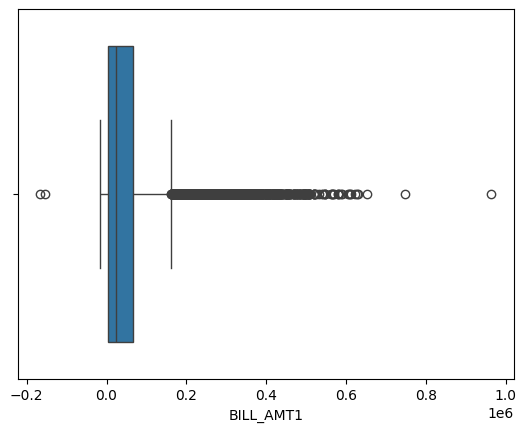

In [26]:
sns.boxplot(x='BILL_AMT1', data=data)

In [ ]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split                    # pyright: ignore[reportMissingModuleSource]


data.columns = data.columns.str.strip()

# Applying filters
filtered = data[
    (data['AGE'] <= 60) &
    (data['PAY_0'] <= 2) &
    (data['PAY_2'] <= 2) &
    (data['PAY_3'] <= 2) &
    (data['PAY_4'] <= 2) &
    (data['PAY_5'] <= 2) &
    (data['PAY_6'] <= 2) &
    (data['LIMIT_BAL'] <= 600000)
].copy()



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Identifying categorical (object) columns
cat_cols = filtered.select_dtypes(include="object").columns.tolist()

# Removing target column if it's in there
if "default" in cat_cols:
    cat_cols.remove("default")


filtered_encoded = pd.get_dummies(
    filtered,
    columns=cat_cols,
    drop_first=True,
    dtype=int
)

# Checking everything is numeric
print(filtered_encoded.dtypes.head())


ID           int64
LIMIT_BAL    int64
AGE          int64
PAY_0        int64
PAY_2        int64
dtype: object


In [55]:
X = filtered_encoded.drop("default", axis=1)
y = filtered_encoded["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train value counts:\n", y_train.value_counts(normalize=True))
print("y_test value counts:\n", y_test.value_counts(normalize=True))


X_train shape: (22776, 30)
X_test shape: (5694, 30)
y_train value counts:
 default
N    0.795838
Y    0.204162
Name: proportion, dtype: float64
y_test value counts:
 default
N    0.795926
Y    0.204074
Name: proportion, dtype: float64


In [37]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [42]:

from imblearn.over_sampling import SMOTE                                          # type: ignore

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())


ImportError: cannot import name '_is_pandas_df' from 'sklearn.utils.validation' (C:\Users\sdubey\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py)

In [43]:
import sys, site
print(sys.executable)
print(site.getusersitepackages())
print(site.getsitepackages())


c:\Program Files\Python312\python.exe
C:\Users\sdubey\AppData\Roaming\Python\Python312\site-packages
['c:\\Program Files\\Python312', 'c:\\Program Files\\Python312\\Lib\\site-packages']


In [58]:
filtered_encoded.select_dtypes(include="object").columns


Index(['default'], dtype='object')

In [59]:
X = filtered_encoded.drop("default", axis=1)
y = filtered_encoded["default"]


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [61]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())


Before SMOTE:
default
N    18126
Y     4650
Name: count, dtype: int64

After SMOTE:
default
Y    18126
N    18126
Name: count, dtype: int64


In [ ]:
#Scaling features before Logistic Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data (resampled)
X_train_res_scaled = scaler.fit_transform(X_train_resampled)

# Transform test data with same scaler
X_test_scaled = scaler.transform(X_test)


LOGISTIC REGRESSION

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_res_scaled, y_train_resampled)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8189322093431682
Logistic Regression ROC-AUC: 0.7011661575060802

Confusion Matrix:
 [[4264  268]
 [ 763  399]]

Classification Report:
               precision    recall  f1-score   support

           N       0.85      0.94      0.89      4532
           Y       0.60      0.34      0.44      1162

    accuracy                           0.82      5694
   macro avg       0.72      0.64      0.66      5694
weighted avg       0.80      0.82      0.80      5694



Logistic Regression Prediction

                Predicted
              0        1
Actual 0    4264     268
Actual 1     763     399

True Negatives (4264) — predicted non-default correctly

False Positives (268) — predicted default but actually non-default

False Negatives (763) — predicted non-default but actually default

True Positives (399) — predicted default correctly


Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.8066385669125395
Random Forest ROC-AUC: 0.7453744495065117

Confusion Matrix:
 [[4164  368]
 [ 733  429]]

Classification Report:
               precision    recall  f1-score   support

           N       0.85      0.92      0.88      4532
           Y       0.54      0.37      0.44      1162

    accuracy                           0.81      5694
   macro avg       0.69      0.64      0.66      5694
weighted avg       0.79      0.81      0.79      5694



Random Forest Classification Interpretation

                Predicted
              0        1
Actual 0    4164     368
Actual 1     733     429

True Negatives (4164) — predicted non-default correctly

False Positives (368) — predicted default but actually non-default

False Negatives (733) — predicted non-default but actually default

True Positives (429) — predicted default correctly


Class 0 (Non-Default)
Precision: 0.85
Recall: 0.92
F1: 0.88

Class 1 (Default)
Precision: 0.54
Recall: 0.37
F1: 0.44


XGBoost Model

In [71]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   --- ------------------------------------ 6.8/72.0 MB 39.2 MB/s eta 0:00:02
   ---------- ----------------------------- 18.1/72.0 MB 47.7 MB/s eta 0:00:02
   ----------------- ---------------------- 30.9/72.0 MB 51.9 MB/s eta 0:00:01
   ----------------------- ---------------- 41.7/72.0 MB 52.0 MB/s eta 0:00:01
   ----------------------------- ---------- 52.4/72.0 MB 51.4 MB/s eta 0:00:01
   ---------------------------------- ----- 62.7/72.0 MB 51.2 MB/s eta 0:00:01
   ---------------------------------------  71.3/72.0 MB 49.8 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 49.9 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 49.9 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 49.9 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 49.9 M


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# 1. Map labels to 0/1
label_map = {'N': 0, 'Y': 1}
y_train_resampled_num = y_train_resampled.map(label_map)
y_test_num = y_test.map(label_map)

# 2. Define model
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# 3. Fit using NUMERIC y
xgb.fit(X_train_resampled, y_train_resampled_num)

# 4. Predict on test set
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# 5. Evaluate using NUMERIC y_test_num
print("XGBoost Accuracy:", accuracy_score(y_test_num, y_pred_xgb))
print("XGBoost ROC-AUC:", roc_auc_score(y_test_num, y_prob_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_num, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_num, y_pred_xgb))



XGBoost Accuracy: 0.8164734808570425
XGBoost ROC-AUC: 0.7569351925416962

Confusion Matrix:
 [[4233  299]
 [ 746  416]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      4532
           1       0.58      0.36      0.44      1162

    accuracy                           0.82      5694
   macro avg       0.72      0.65      0.67      5694
weighted avg       0.80      0.82      0.80      5694



Confusion Matrix evaluation

               Predicted
             |   0   |   1
--------------------------------
Actual  0    | 4233  |  299
Actual  1    |  746  |  416


True Negatives (4233) — predicted non-default correctly

False Positives (299) — predicted default but actually non-default

False Negatives (746) — predicted non-default but actually default

True Positives (416) — predicted default correctly

Class 0 (Non Default):
Precision: 0.85
Recall:    0.93
F1:        0.89

Class 1 (Default):
Precision: 0.58
Recall:    0.36
F1:        0.44


FINAL MODEL COMPARISON

     Model	                      Accuracy	  ROC-AUC	F1(Default=1)	      Model is best For
Logistic Regression	               0.8189	  0.7012	0.44	               Interpretability
Random Forest	                   0.8066	  0.7454	0.44	               Non-linear patterns
XGBoost	                           0.8165	  0.7569	0.44	               Overall best performance

Logistic Regression has the highest accuracy, but the lowest ROC-AUC.

Random Forest improves ROC-AUC but is slightly lower in accuracy.

XGBoost gives the best balance between strong accuracy and high ROC-AUC.